In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
def set_ticklabels(ax, size=18):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(size)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(size)
        label_y.set_family('serif')

In [71]:
def plot_comparison(v_max=300, view_angle=0, logT=4.0, logtau=6.0):
    filename_in="../data/CLARA/Rotating%dSphere%dt.ascii"%(v_max, int(logtau))
    filename_out ="../data/tmp/Sphere_V%d_T2E7_%d_out.dat"%(v_max,view_angle)
    filename_obs = "../data/obs/tol.txt"
    filename_multiphase = "../data/multiphase/spectra/000_791.dat"
    command = "python viewing_angle.py %s %s %d > %s"%(filename_obs, filename_in, view_angle, filename_out)
    

    os.system(command)
    data = np.loadtxt(filename_out)
    tol = np.loadtxt(filename_obs)
    multiphase = np.loadtxt(filename_multiphase)
    voff = 39.2342980263
    
    v_th = 12.85*np.sqrt((10.0**logT)/(10.0**4.0))
    binT = tol[1,0]-tol[0,0]
    binC = 12.85*(data[1,1] - data[0,1])

    vel_theory = -data[:,1]*v_th + voff
    intensity_theory = data[:,0]
    vel_obs = tol[:,0]
    intensity_obs = tol[:,1]
    vel_multiphase = multiphase[:,0]
    intensity_multiphase = multiphase[:,1]
        
    norm_theory = np.fabs(np.trapz(intensity_theory, vel_theory))
    norm_obs = np.fabs(np.trapz(intensity_obs, vel_obs))
    norm_multiphase = np.fabs(np.trapz(intensity_multiphase, vel_multiphase))
    
    intensity_theory = intensity_theory/norm_theory
    intensity_obs = intensity_obs/norm_obs
    intensity_multiphase = intensity_multiphase/norm_multiphase
    
    #fig, ax = pyplot.subplots(figsize=(8, 8))
    fig = plt.figure(1, figsize=(11,10))
    ax = plt.axes()
    set_ticklabels(ax, size=35)
    plt.plot(vel_multiphase/100, intensity_multiphase*1E3, label=r"${\mathrm{Multiphase}}$", linewidth=4, alpha=0.5)
    plt.plot(vel_theory/100, intensity_theory*1E3,label=r"${\mathrm{Rotation}}$",linewidth=4,alpha=0.5)
    plt.plot(vel_obs/100, intensity_obs*1E3)
    plt.scatter(vel_obs/100, intensity_obs*1E3, label=r"$\mathrm{Tololo\ 1214-277}$",s=50.0)
    plt.legend(loc=1, prop={'size':28},scatterpoints=1)
    ax.set_xlim([-12.0, 12.0])
    ax.set_ylim([0.0, 1.6])
    ax.grid(True)

    plt.xlabel(r"$v \mathrm{[100\ km\ s^{-1}]}$", fontsize=40)
    plt.ylabel(r"$\mathrm{Intensity\ [arbitrary\ units]}$", fontsize=40)
    plt.savefig("../figs/CLARA-TOL-main.pdf", bbox_inches='tight')
    plt.show(fig)
    plt.close(fig)
    return 

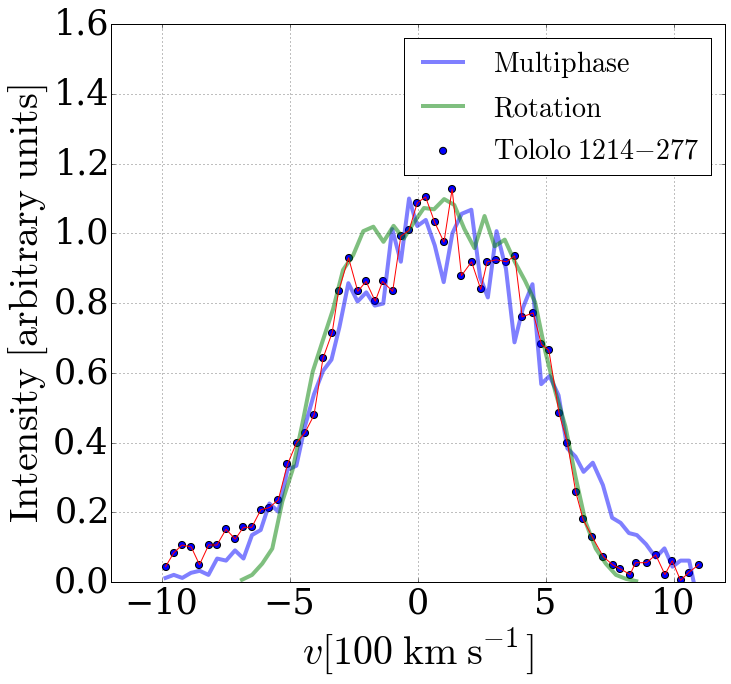

In [72]:
plot_comparison(v_max=300, view_angle=20, logT=4.2, logtau=7.0)